In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [50]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

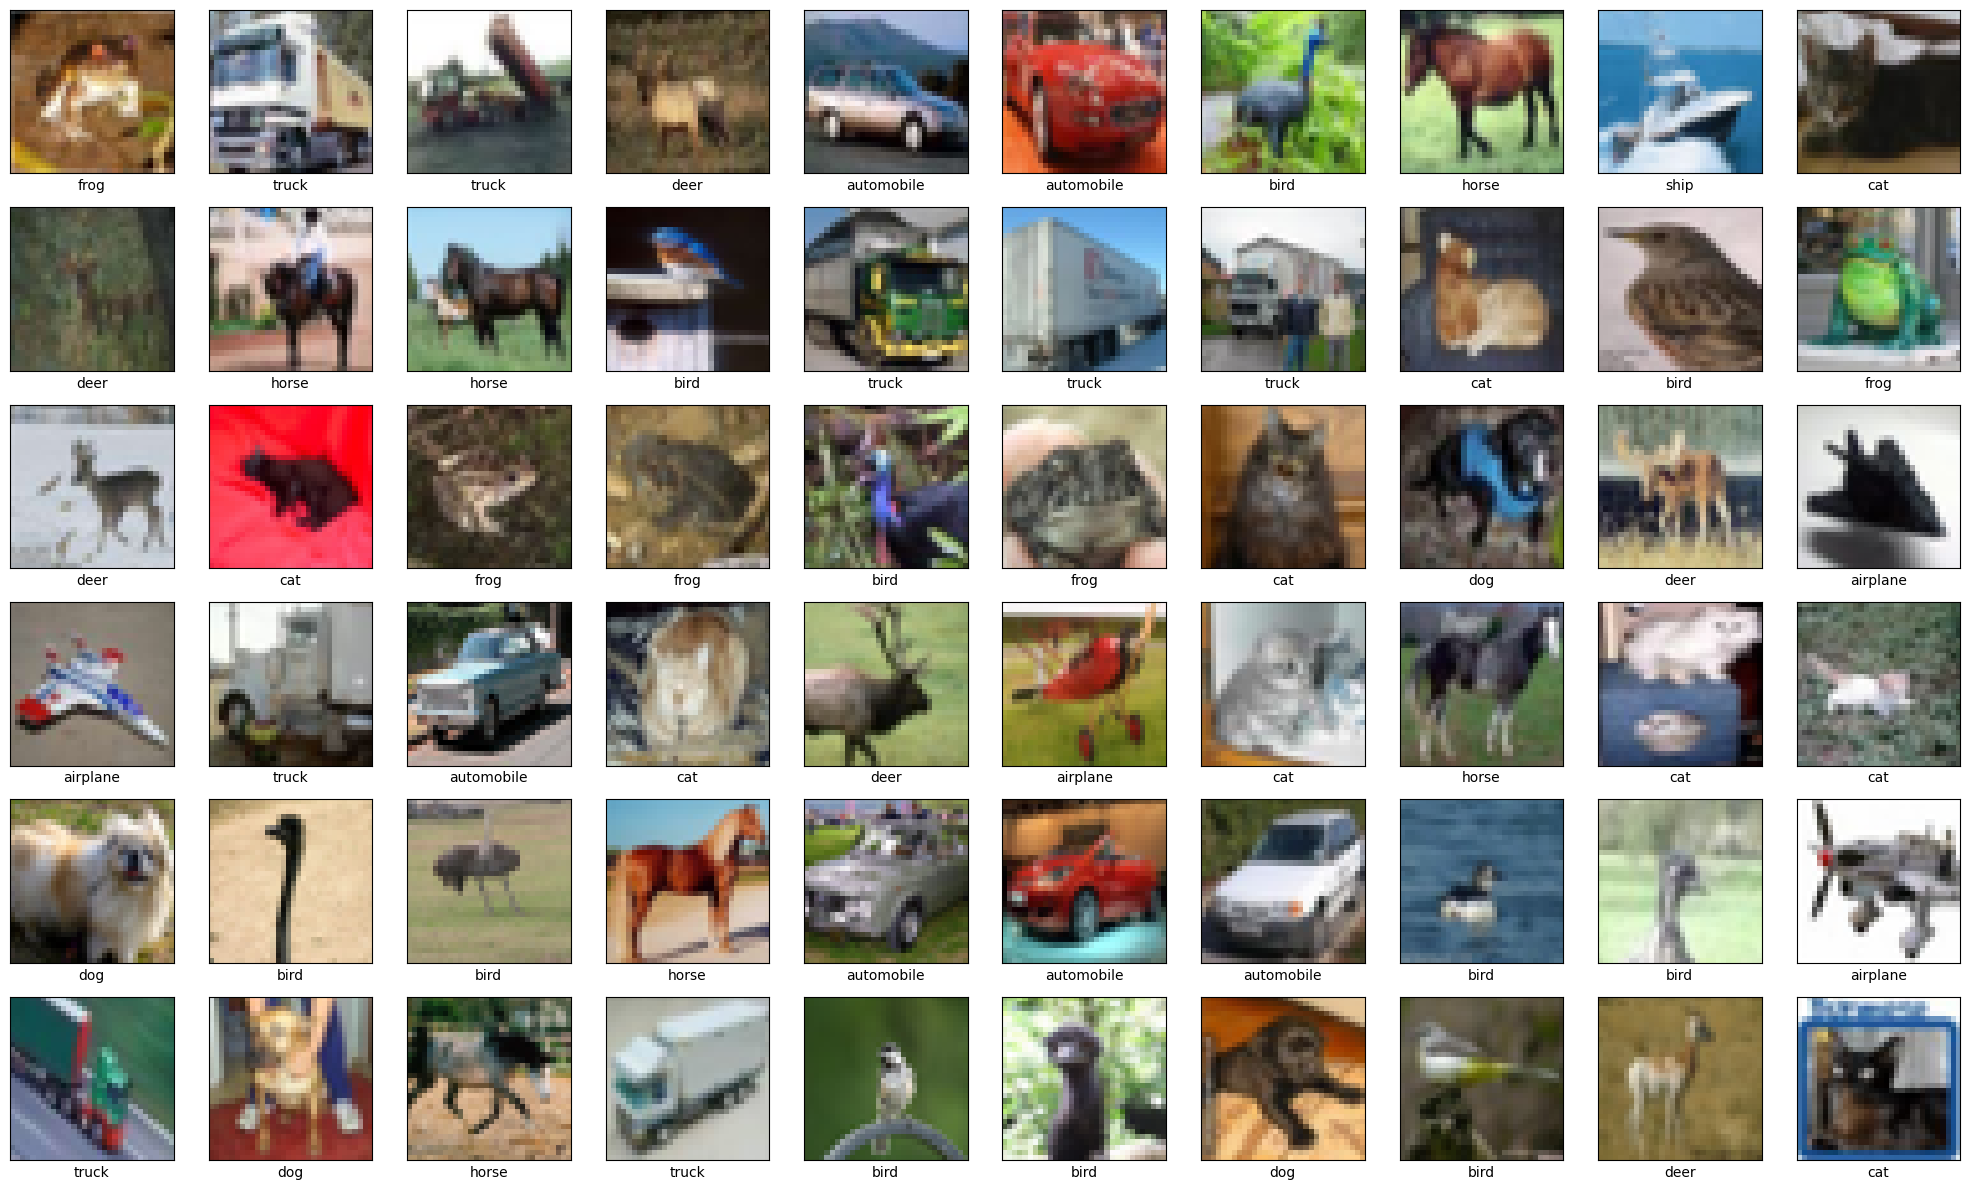

In [52]:
plt.figure(figsize=(20, 12))
rows = 6
cols = 10

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.tight_layout()
plt.show()


In [53]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    # Block 1
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 2
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 3
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 4
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Block 5
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Flatten(),

    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [54]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/10
782/782 [==============================] - 39s 39ms/step - loss: 1.7901 - accuracy: 0.3373 - val_loss: 1.5496 - val_accuracy: 0.4279
Epoch 2/10
782/782 [==============================] - 32s 40ms/step - loss: 1.4749 - accuracy: 0.4617 - val_loss: 1.3869 - val_accuracy: 0.4865
Epoch 3/10
782/782 [==============================] - 31s 40ms/step - loss: 1.3224 - accuracy: 0.5218 - val_loss: 1.3020 - val_accuracy: 0.5227
Epoch 4/10
782/782 [==============================] - 31s 40ms/step - loss: 1.2183 - accuracy: 0.5629 - val_loss: 1.2403 - val_accuracy: 0.5581
Epoch 5/10
782/782 [==============================] - 30s 39ms/step - loss: 1.1268 - accuracy: 0.5971 - val_loss: 1.2004 - val_accuracy: 0.5615
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 1.0485 - accuracy: 0.6271 - val_loss: 1.0754 - val_accuracy: 0.6178
Epoch 7/10
782/782 [==============================] - 30s 39ms/step - loss: 0.9713 - accuracy: 0.6549 - val_loss: 1.0580 - val_accuracy:

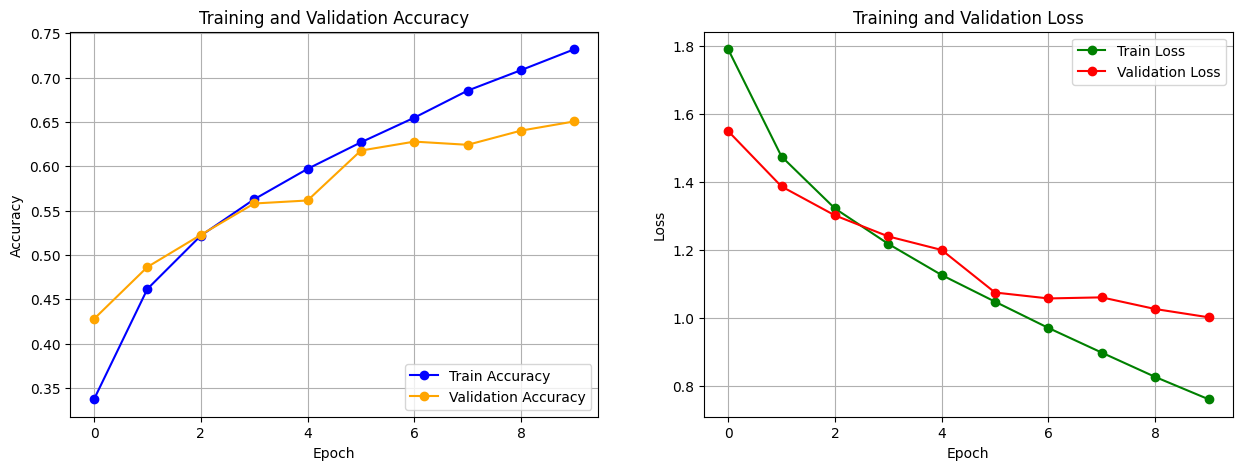

In [56]:
plt.figure(figsize=(15, 5))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', color='green', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [57]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 1.0027 - accuracy: 0.6507

Test Accuracy: 0.6506999731063843

Test Loss: 1.0026865005493164


In [37]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [58]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6704 - accuracy: 0.7642 - val_loss: 0.9838 - val_accuracy: 0.6699
Epoch 2/10
782/782 [==============================] - 30s 39ms/step - loss: 0.6263 - accuracy: 0.7813 - val_loss: 0.9965 - val_accuracy: 0.6708
Epoch 3/10
782/782 [==============================] - 31s 39ms/step - loss: 0.5965 - accuracy: 0.7903 - val_loss: 1.0629 - val_accuracy: 0.6531
Epoch 4/10
782/782 [==============================] - 31s 39ms/step - loss: 0.5629 - accuracy: 0.8028 - val_loss: 1.0381 - val_accuracy: 0.6634
Epoch 5/10
782/782 [==============================] - 31s 39ms/step - loss: 0.5243 - accuracy: 0.8194 - val_loss: 1.1050 - val_accuracy: 0.6363
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 0.4947 - accuracy: 0.8286 - val_loss: 1.1631 - val_accuracy: 0.6399
Epoch 7/10
782/782 [==============================] - 31s 39ms/step - loss: 0.4586 - accuracy: 0.8420 - val_loss: 1.0960 - val_accuracy:

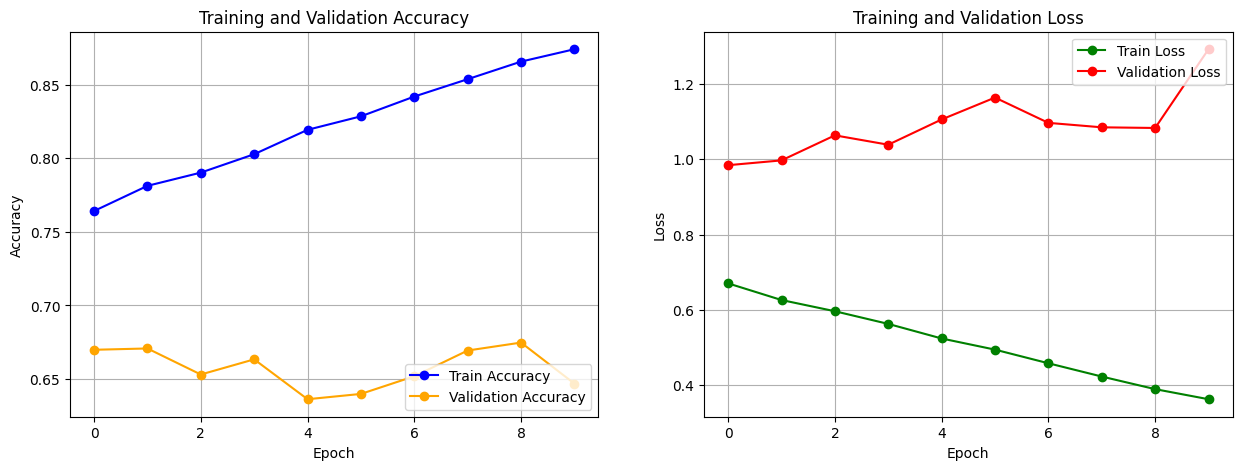

In [61]:
plt.figure(figsize=(15, 5))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', color='green', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [62]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 1.2913 - accuracy: 0.6469

Test Accuracy: 0.6468999981880188

Test Loss: 1.2913134098052979


In [63]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [64]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.000008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [66]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/10
782/782 [==============================] - 31s 39ms/step - loss: 0.7761 - accuracy: 0.7253 - val_loss: 0.9854 - val_accuracy: 0.6585
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 0.7332 - accuracy: 0.7394 - val_loss: 1.1357 - val_accuracy: 0.6156
Epoch 3/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6885 - accuracy: 0.7570 - val_loss: 0.9816 - val_accuracy: 0.6598
Epoch 4/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6488 - accuracy: 0.7732 - val_loss: 0.8979 - val_accuracy: 0.6897
Epoch 5/10
782/782 [==============================] - 32s 41ms/step - loss: 0.6064 - accuracy: 0.7863 - val_loss: 0.9138 - val_accuracy: 0.6924
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 0.5651 - accuracy: 0.8014 - val_loss: 0.8795 - val_accuracy: 0.7010
Epoch 7/10
782/782 [==============================] - 32s 41ms/step - loss: 0.5298 - accuracy: 0.8118 - val_loss: 0.9587 - val_accuracy:

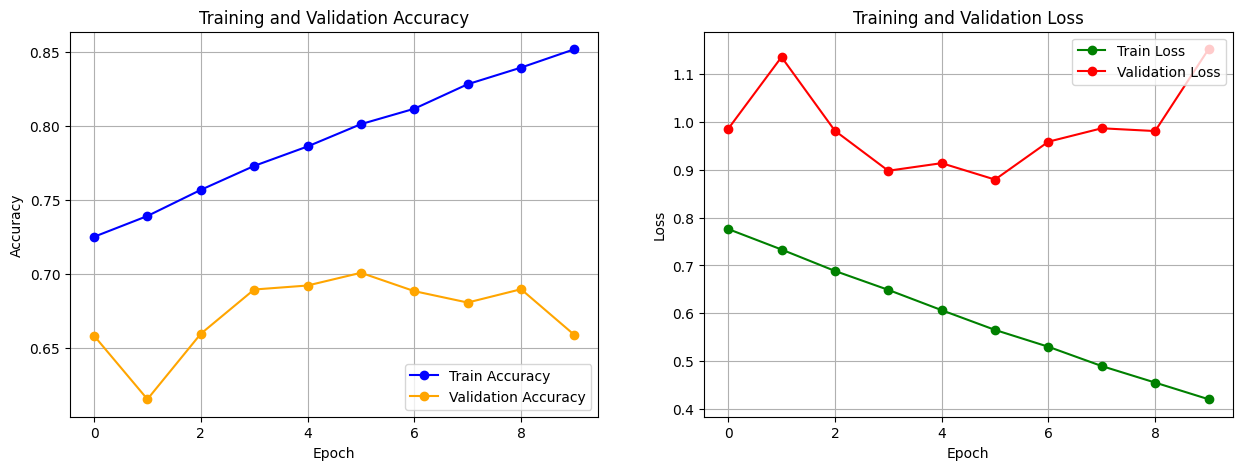

In [67]:
plt.figure(figsize=(15, 5))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], 'o-', color='blue', label='Train Accuracy')
plt.plot(h.history['val_accuracy'], 'o-', color='orange', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], 'o-', color='green', label='Train Loss')
plt.plot(h.history['val_loss'], 'o-', color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [68]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 1.1520 - accuracy: 0.6590

Test Accuracy: 0.6589999794960022

Test Loss: 1.15204918384552


Here I have used VGGNET model and three optimizer to see which optimizer provides best accuracy. The three optimizers are Adam, SGD, and RMSprop. For Adam optimizer we got accuracy is good enough and overfitting is low. But in SGD and RMSprop accuracy is high bt we got overfitting here. So, for VGGNET model Adam optimizer perform best among three optimizers.